<a href="https://colab.research.google.com/github/Martim-21805485/IASolucoes/blob/main/Lab9_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 9
Dijkstra's algorithm

## Purpose
Study of a informed search algorithm

## Methodology
Implementation

## Results
An implementation of Dijkstra's algorithm in Python 

## Suggested next steps
Expand to A*

# Setup

## Library import
We import all the required Python libraries

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import networkx as nx

# Typing
from types import SimpleNamespace

# Parameters

In [ ]:
graph_dict = \
    {
        's': {('a', 7), ('b', 2), ('c', 3)},
        'a': {('b', 3), ('d', 4), ('s', 7)},
        'b': {('d', 4), ('h', 1), ('s', 2)},
        'c': {('l', 2), ('s', 3), ('s', 3)},
        'd': {('a', 4), ('b', 4), ('f', 5)},
        'e': {('g', 2), ('k', 5)},
        'f': {('d', 5), ('h', 3)},
        'g': {('e', 2), ('h', 3)},
        'h': {('b', 1), ('f', 3), ('g', 2)},
        'i': {('j', 6), ('k', 4), ('l', 4)},
        'j': {('i', 6), ('k', 4), ('l', 4)},
        'k': {('e', 5), ('i', 4), ('j', 4)},
        'l': {('c', 2), ('i', 4), ('j', 4)},
    }

graph_tuples = \
    [
        ('s', 'a', 7), ('s', 'b', 2), ('s', 'c', 3), ('a', 'b', 3),
        ('a', 'd', 4), ('a', 's', 7), ('b', 'd', 4), ('b', 'h', 1),
        ('b', 's', 2), ('c', 'l', 2), ('c', 's', 3), ('c', 's', 3),
        ('d', 'a', 4), ('d', 'b', 4), ('d', 'f', 5), ('e', 'g', 2),
        ('e', 'k', 5), ('f', 'd', 5), ('f', 'h', 3), ('g', 'e', 2),
        ('g', 'h', 3), ('h', 'b', 1), ('h', 'f', 3), ('h', 'g', 2),
        ('i', 'j', 6), ('i', 'k', 4), ('i', 'l', 4), ('j', 'i', 6),
        ('j', 'k', 4), ('j', 'l', 4), ('k', 'e', 5), ('k', 'i', 4),
        ('k', 'j', 4), ('l', 'c', 2), ('l', 'i', 4), ('l', 'j', 4)
    ]

Look at the graph

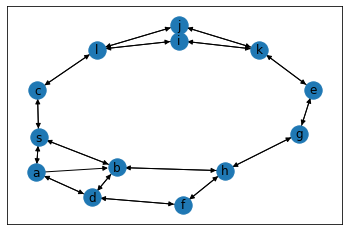

In [ ]:
G = pd.DataFrame(graph_tuples, columns=['In', 'Out', 'Weight'])
nG = nx.from_pandas_edgelist(G, source='In', target='Out', edge_attr='Weight', create_using=nx.DiGraph)
nx.draw_networkx(nG)

# Dijkstra

Implement Dijkstra algorithm using the building blocks from previous labs.

In [ ]:
def dijkstra(graph, initial: str, goal: str):
    """Computes Dijkstra
    
    Parameters
    ----------
    graph : list of tuples OR dictionary
        representation of a graph
    initial : str
        initial node
    goal : str
        target node
    
    Returns
    -------
    Composed object
        cost - cost from inital to goal node through shortest path
        path - shortest path 
    
    """
    
    ###########
    ## Implement Dijkstra here
    
    
    

    # in the end you'll have to udpate these variables
    cost = None
    path = None
    ########
    
    shortest_path = SimpleNamespace()
    shortest_path.cost = cost
    shortest_path.path = path
    
    return shortest_path

In [ ]:
import logging

logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S')

# keep this one to only show results
logging.getLogger().setLevel(logging.WARNING)
# keep this one to see the whole process
logging.getLogger().setLevel(logging.INFO)

def dijkstra(graph, initial: str, goal: str):
    """Computes Dijkstra
    
    Parameters
    ----------
    graph : list of tuples OR dictionary
        representation of a graph
    initial : str
        initial node
    goal : str
        target node
    
    Returns
    -------
    Composed object
        cost - cost from inital to goal node through shortest path
        path - shortest path 
    
    """
    
    nodes = set(graph.keys())
    
    # Mark all nodes unvisited
    unvisited_set = nodes
    
    # Assign to every node adistance value
    # Create a structure to keep the path
    weights = {node: np.inf for node in nodes}
    previous = {node: None for node in nodes}
    
    # Set the initial node as current.
    current_node = initial
    current_weight = 0
    
    # while there are nodes to visit
    while unvisited_set:
        
        logging.info('current_node:  {}'.format(current_node))
        logging.info('current_weight:{}'.format(current_weight))
        logging.info('unvisited_set: {}'.format(unvisited_set))
        logging.info('weights:       {}'.format(weights))
        logging.info('previous:      {}'.format(previous))
        logging.info('---------------------------------------------')
        
        # For the current node, consider all of its unvisited neighbours and 
        # calculate their tentative distances through the current node. 
        for neighbor, neighbor_weight in graph[current_node]:
            next_weight = current_weight + neighbor_weight
            
            # Compare the computed distance to the current 
            # assigned value and assign the smaller one. 
            if  next_weight < weights[neighbor]:
                weights[neighbor] = next_weight
                previous[neighbor] = current_node

        # Mark the current node as visited and remove it from the 
        # unvisited set
        unvisited_set.remove(current_node)
        

        # If is goal the algorithm has finished.
        if current_node == goal:
            break

        # Otherwise, select the unvisited node that is marked with the 
        # smallest distance and set it as the new "current node", 
        current_node = min(unvisited_set, key=lambda x: weights[x])
        current_weight = weights[current_node]
    
    # Un-roll path
    path = []
    current = goal
    path.append(current)
    while current is not initial:
        prev = previous[current]
        path.append(prev)
        current = prev
        
    path.reverse()
    
    # Udpate the variables
    cost = weights[goal]
    path = path
    ########
    
    shortest_path = SimpleNamespace()
    shortest_path.cost = cost
    shortest_path.path = path
    
    return shortest_path

In [ ]:
shortest_path =  dijkstra(graph_dict, 'a', 'i')

2021-06-03 01:32:46 INFO     current_node:  a
2021-06-03 01:32:46 INFO     current_weight:0
2021-06-03 01:32:46 INFO     unvisited_set: {'h', 'a', 's', 'b', 'k', 'i', 'e', 'g', 'j', 'c', 'l', 'f', 'd'}
2021-06-03 01:32:46 INFO     weights:       {'h': inf, 'a': inf, 's': inf, 'b': inf, 'k': inf, 'i': inf, 'e': inf, 'g': inf, 'j': inf, 'c': inf, 'l': inf, 'f': inf, 'd': inf}
2021-06-03 01:32:46 INFO     previous:      {'h': None, 'a': None, 's': None, 'b': None, 'k': None, 'i': None, 'e': None, 'g': None, 'j': None, 'c': None, 'l': None, 'f': None, 'd': None}
2021-06-03 01:32:46 INFO     ---------------------------------------------
2021-06-03 01:32:46 INFO     current_node:  b
2021-06-03 01:32:46 INFO     current_weight:3
2021-06-03 01:32:46 INFO     unvisited_set: {'h', 's', 'b', 'k', 'i', 'e', 'g', 'j', 'c', 'l', 'f', 'd'}
2021-06-03 01:32:46 INFO     weights:       {'h': inf, 'a': inf, 's': 7, 'b': 3, 'k': inf, 'i': inf, 'e': inf, 'g': inf, 'j': inf, 'c': inf, 'l': inf, 'f': inf, 'd

In [ ]:
shortest_path.cost

14

In [ ]:
shortest_path.path

['a', 'b', 's', 'c', 'l', 'i']

## References

Dijkstra, E. (1959). A note on two problems in connexion with graphs. Numerische Mathematik, 1, 269-271.